In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = load_breast_cancer()
X,y = load_breast_cancer(return_X_y = True)

In [5]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
y.shape

(569,)

In [7]:
df = pd.DataFrame(X, columns = dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df1 = df.sample(n = 9, axis = 1)
df1.head()

,mean area,worst area,mean radius,mean texture,worst symmetry,worst concavity,perimeter error,fractal dimension error,mean concavity
0,1001.0,2019.0,17.99,10.38,0.4601,0.7119,8.589,0.006193,0.3001
1,1326.0,1956.0,20.57,17.77,0.2750,0.2416,3.398,0.003532,0.0869
2,1203.0,1709.0,19.69,21.25,0.3613,0.4504,4.585,0.004571,0.1974
3,386.1,567.7,11.42,20.38,0.6638,0.6869,3.445,0.009208,0.2414
4,1297.0,1575.0,20.29,14.34,0.2364,0.4000,5.438,0.005115,0.1980


In [9]:
df1['target'] = y
df1.head(20)

,mean area,worst area,mean radius,mean texture,worst symmetry,worst concavity,perimeter error,fractal dimension error,mean concavity,target
0,1001.0,2019.0,17.99,10.38,0.4601,0.7119,8.589,0.006193,0.30010,0
1,1326.0,1956.0,20.57,17.77,0.2750,0.2416,3.398,0.003532,0.08690,0
2,1203.0,1709.0,19.69,21.25,0.3613,0.4504,4.585,0.004571,0.19740,0
3,386.1,567.7,11.42,20.38,0.6638,0.6869,3.445,0.009208,0.24140,0
4,1297.0,1575.0,20.29,14.34,0.2364,0.4000,5.438,0.005115,0.19800,0
5,477.1,741.6,12.45,15.70,0.3985,0.5355,2.217,0.005082,0.15780,0
6,1040.0,1606.0,18.25,19.98,0.3063,0.3784,3.180,0.002179,0.11270,0
7,577.9,897.0,13.71,20.83,0.3196,0.2678,3.856,0.005412,0.09366,0
8,519.8,739.3,13.00,21.82,0.4378,0.5390,2.406,0.003749,0.18590,0
9,475.9,711.4,12.46,24.04,0.4366,1.1050,2.039,0.010080,0.22730,0


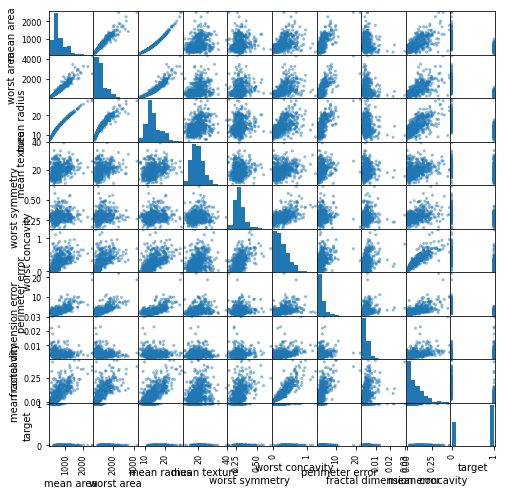

In [10]:
# scatter matrix
pd.plotting.scatter_matrix(df1, figsize = (8,8));

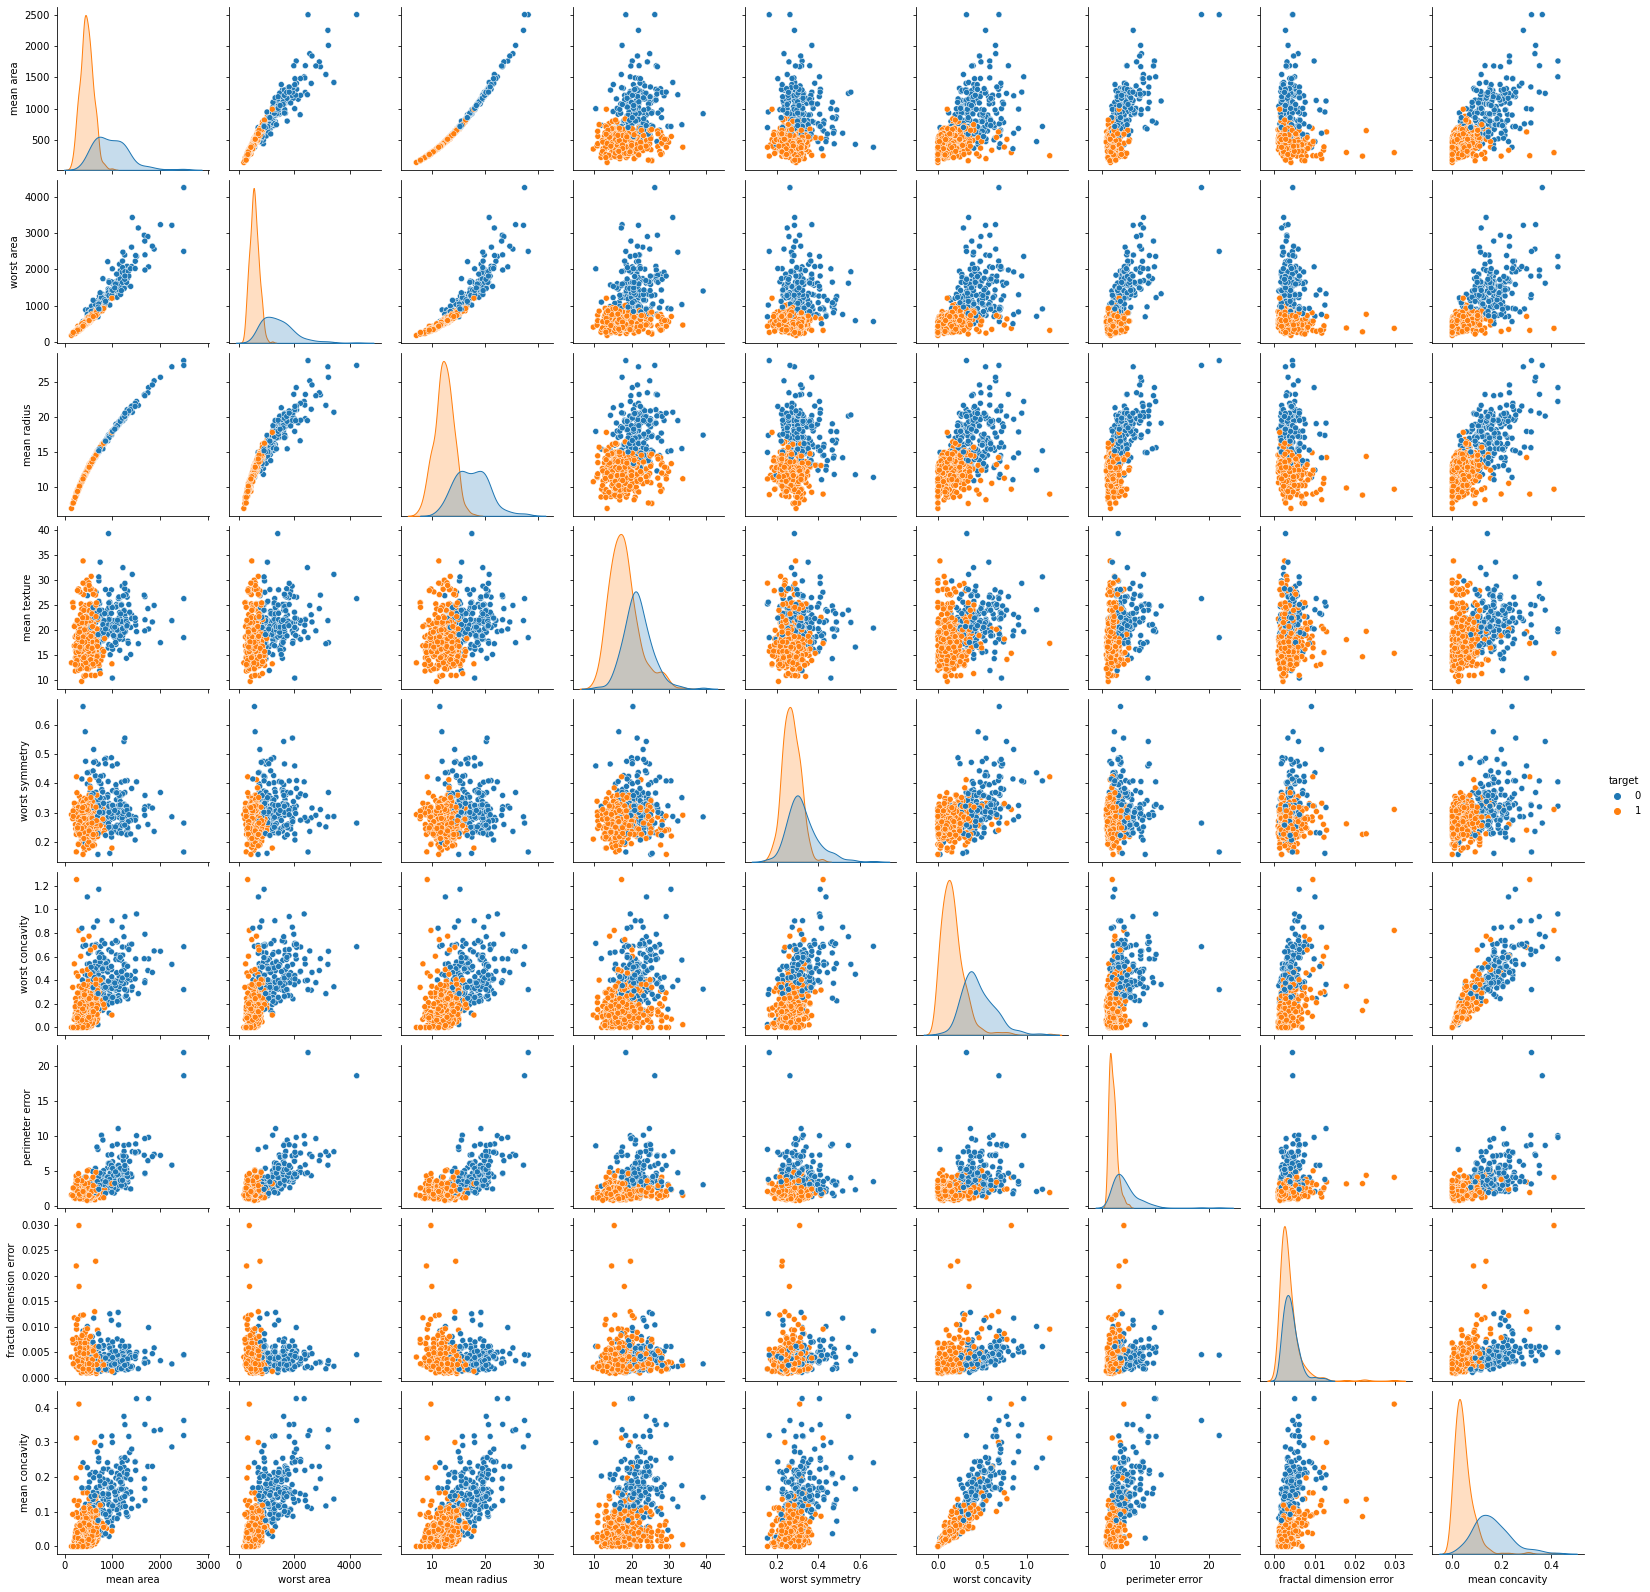

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df1,hue='target');


In [12]:
pca = PCA(n_components = 4)
pca.fit(X)

PCA(n_components=4)

In [13]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04])

In [14]:
np.sum(pca.explained_variance_ratio_)

0.9998996040827272

In [15]:
pca.components_

array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
         6.42005481e-06,  1.01275937e-04,  1.68928625e-04,
         7.36658178e-05,  1.78986262e-05,  1.61356159e-06],
       [ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,
         8.51823720e-01, -1.48194356e-05, -2.68862249e-06,
         7.51419574e-05,  4.63501038e-05, -2.52430431e-05,
        -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
         8.19640791e-04,  7.51112451e-03,  1.49438131e-06,
         1.27357957e-05,  2.86921009e-05,  9.36007477e-06,
         1.22647432e-05,  2.89683790e-07, -5.68673345e-

In [16]:
import sklearn.preprocessing as sklp

scaled_data = sklp.StandardScaler()
XX = scaled_data.fit_transform(X)

In [17]:
pca = PCA(n_components = 4)
pca.fit(XX)

PCA(n_components=4)

In [18]:
np.sum(pca.explained_variance_ratio_)

0.792385058244331